<a href="https://colab.research.google.com/github/esintopaktas/DSA-210/blob/main/Wage_Insurance_Hypothesis_Preprocessing_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data** **Preprocessing**





In [15]:
import pandas as pd


wage_df = pd.read_csv("median_average_wages.csv")
insurance_df = pd.read_csv("health_insurance_coverage.csv")


wage_df = wage_df[(wage_df["year"] >= 2000) & (wage_df["year"] <= 2019)]
insurance_df = insurance_df[(insurance_df["year"] >= 2000) & (insurance_df["year"] <= 2019)]


wage_filtered = wage_df[[
    "year",
    "men_average",
    "women_average",
    "white_men_average",
    "black_men_average"
]]

insurance_filtered = insurance_df[[
    "year",
    "men",
    "women",
    "white_men",
    "black_men"
]]


preprocessed_df = pd.merge(wage_filtered, insurance_filtered, on="year")


preprocessed_df.to_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv", index=False)


# Hypothesis Testing
Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for men compared to women.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for men compared to women.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

diff_men = df["men_average"] - df["men"]
diff_women = df["women_average"] - df["women"]


t_stat_1, p_two_sided_1 = ttest_ind(diff_men, diff_women, equal_var=False)


p_one_sided_1 = p_two_sided_1 / 2 if t_stat_1 > 0 else 1 - p_two_sided_1 / 2


print("Hypothesis 1: Men > Women (wage-insurance proxy)")
print(f"T-statistic: {t_stat_1:.4f}")
print(f"One-sided p-value: {p_one_sided_1:.4f}")
print("Significant at α = 0.05?", p_one_sided_1 < 0.05)


Hypothesis 1: Men > Women (wage-insurance proxy)
T-statistic: -0.6856
One-sided p-value: 0.7513
Significant at α = 0.05? False


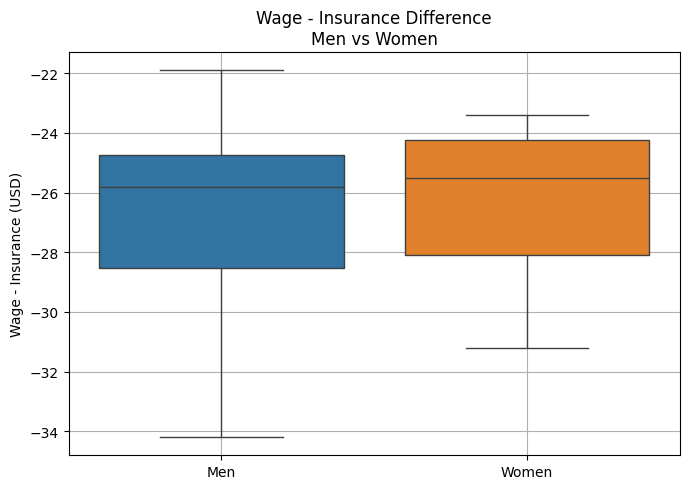

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


df["men_diff"] = df["men_average"] - df["men"]
df["women_diff"] = df["women_average"] - df["women"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "Men": df["men_diff"],
    "Women": df["women_diff"]
}))
plt.title("Wage - Insurance Difference\nMen vs Women")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for White men compared to Black men.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for White men compared to Black men.

In [ ]:

diff_white = df["white_men_average"] - df["white_men"]
diff_black = df["black_men_average"] - df["black_men"]


t_stat_2, p_two_sided_2 = ttest_ind(diff_white, diff_black, equal_var=False)


p_one_sided_2 = p_two_sided_2 / 2 if t_stat_2 > 0 else 1 - p_two_sided_2 / 2


print("Hypothesis 2: White Men > Black Men (wage-insurance proxy)")
print(f"T-statistic: {t_stat_2:.4f}")
print(f"One-sided p-value: {p_one_sided_2:.4f}")
print("Significant at α = 0.05?", p_one_sided_2 < 0.05)


Hypothesis 2: White Men > Black Men (wage-insurance proxy)
T-statistic: -0.8095
One-sided p-value: 0.7880
Significant at α = 0.05? False


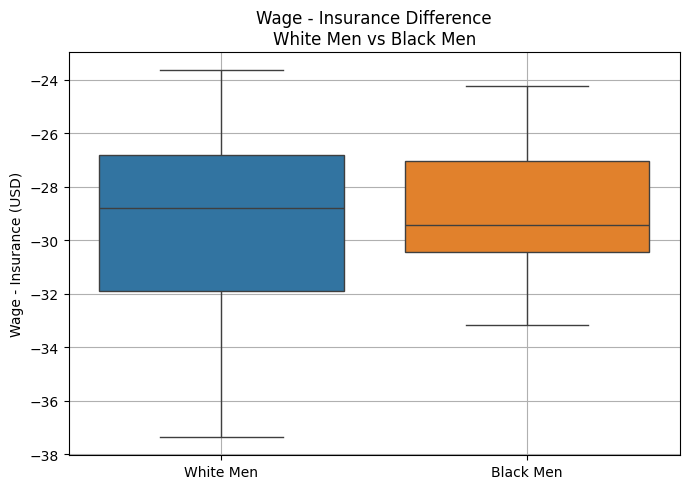

In [ ]:

df["white_diff"] = df["white_men_average"] - df["white_men"]
df["black_diff"] = df["black_men_average"] - df["black_men"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "White Men": df["white_diff"],
    "Black Men": df["black_diff"]
}))
plt.title("Wage - Insurance Difference\nWhite Men vs Black Men")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Visualization

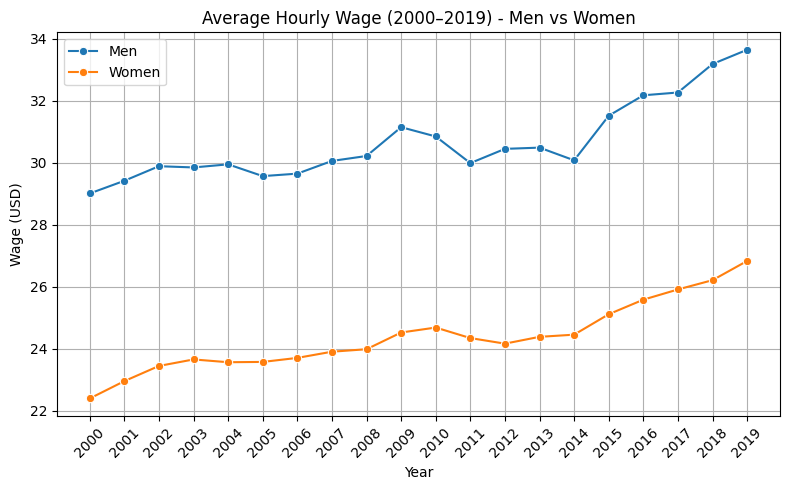

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["men_average"], label="Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["women_average"], label="Women", marker="o")
plt.title("Average Hourly Wage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


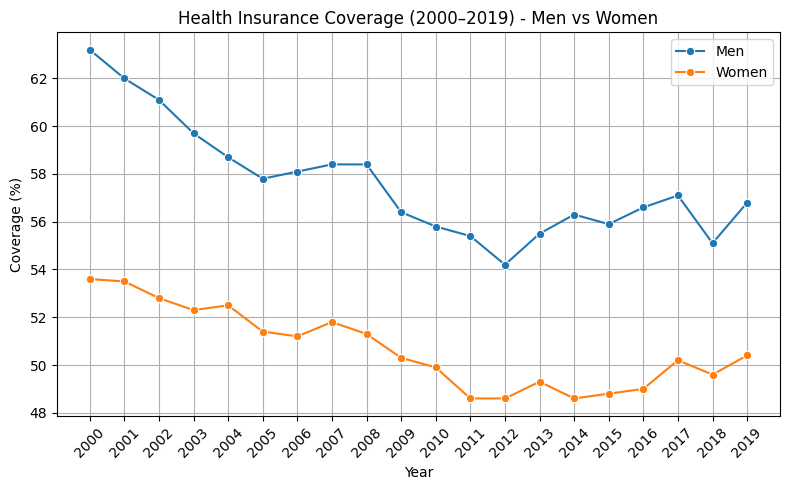

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["men"], label="Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["women"], label="Women", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


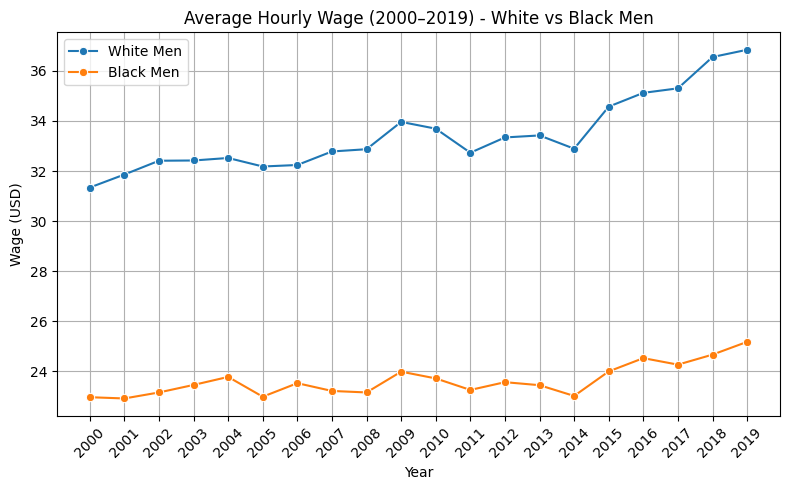

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["white_men_average"], label="White Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["black_men_average"], label="Black Men", marker="o")
plt.title("Average Hourly Wage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


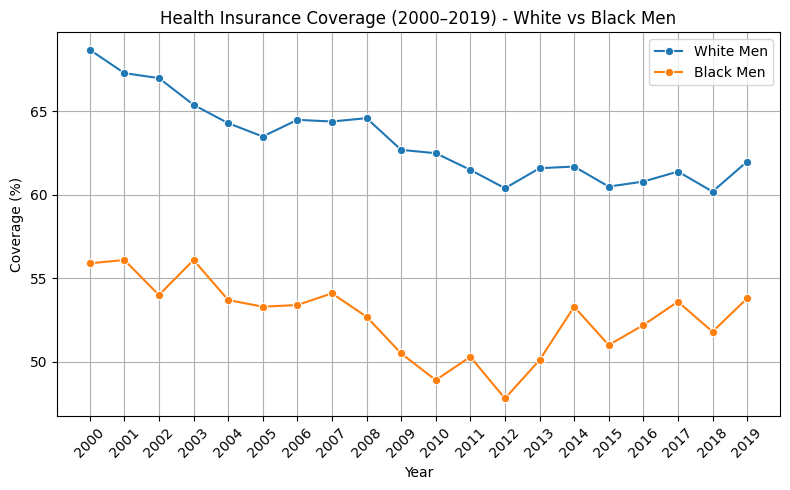

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["white_men"], label="White Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["black_men"], label="Black Men", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Note: AI tools such as ChatGPT and Gemini were used during data cleaning, visualization, and statistical testing phases of this project.

# MACHİNE LEARNİNG TECHNİQUES


# k-Nearest Neighbors (kNN)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


knn_best_model = KNeighborsRegressor(n_neighbors=3)
knn_best_model.fit(X_train, y_train)
y_pred_knn_best = knn_best_model.predict(X_test)


r2_best = r2_score(y_test, y_pred_knn_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_knn_best))


print("KNN Regressor Results (k=3):")
print("R² Score:", round(r2_best, 3))
print("RMSE:", round(rmse_best, 2), "%")

KNN Regressor Results (k=3):
R² Score: 0.32
RMSE: 1.84 %


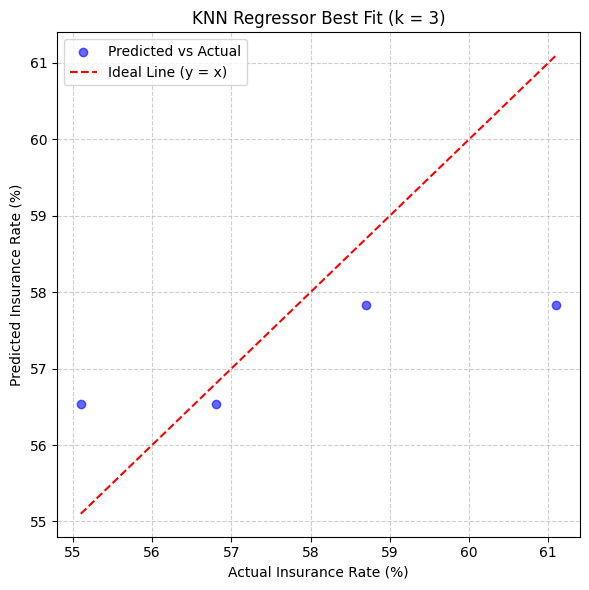

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse


knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')
plt.xlabel("Actual Insurance Rate (%)")
plt.ylabel("Predicted Insurance Rate (%)")
plt.title(f"KNN Regressor Best Fit (k = {best_k})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

X = df[['men_average']]
y = df['men']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

print("KNN Regressor Hyperparameter Tuning Results for Men Average:\n")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_neighbors = {k}")
    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse

print(f"KNN Regressor Results for Men Average (k={best_k}):")
print(f"R² Score: {best_r2:.3f}")
print(f"RMSE: {best_rmse:.2f} %\n")

KNN Regressor Hyperparameter Tuning Results for Men Average:

n_neighbors = 1
→ R² Score: 0.150, RMSE: 2.06 %

n_neighbors = 3
→ R² Score: 0.320, RMSE: 1.84 %

n_neighbors = 5
→ R² Score: 0.232, RMSE: 1.96 %

n_neighbors = 7
→ R² Score: 0.310, RMSE: 1.85 %

n_neighbors = 10
→ R² Score: 0.217, RMSE: 1.98 %

n_neighbors = 15
→ R² Score: 0.093, RMSE: 2.13 %

KNN Regressor Results for Men Average (k=3):
R² Score: 0.320
RMSE: 1.84 %



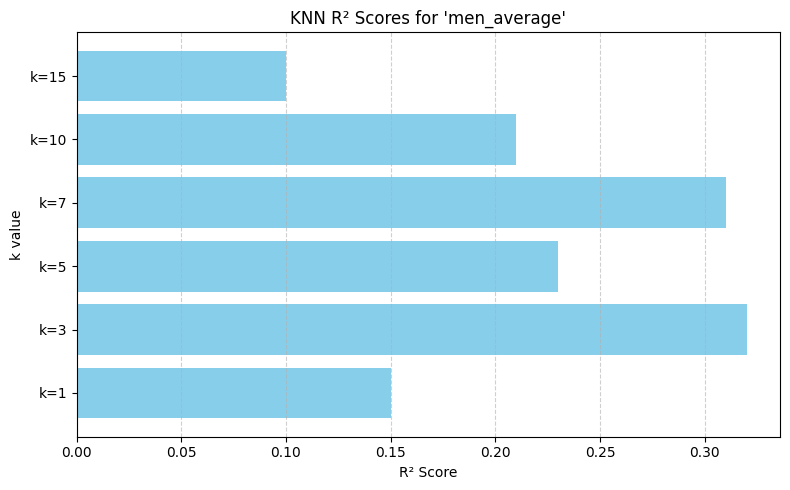

In [1]:
import matplotlib.pyplot as plt


k_values = [1, 3, 5, 7, 10, 15]
r2_scores = [0.15, 0.32, 0.23, 0.31, 0.21, 0.10]


plt.figure(figsize=(8, 5))
plt.barh([f"k={k}" for k in k_values], r2_scores, color='skyblue')
plt.title("KNN R² Scores for 'men_average'")
plt.xlabel("R² Score")
plt.ylabel("k value")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


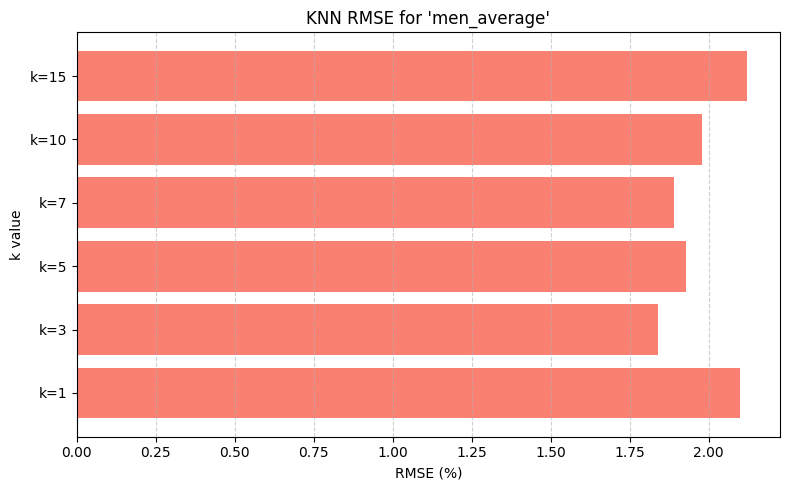

In [2]:
import matplotlib.pyplot as plt


k_values = [1, 3, 5, 7, 10, 15]
rmse_scores = [2.1, 1.84, 1.93, 1.89, 1.98, 2.12]


plt.figure(figsize=(8, 5))
plt.barh([f"k={k}" for k in k_values], rmse_scores, color='salmon')
plt.title("KNN RMSE for 'men_average'")
plt.xlabel("RMSE (%)")
plt.ylabel("k value")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# KNN RESULTS

Configuration: k=1

R² Score: 0.15
RMSE: 2.10%
This basic configuration showed weak predictive power, capturing only 15% of the variance. The model likely overfit the training data, which is a common issue with very low k values due to high variance and low bias.
Configuration: k=3

R² Score: 0.32
RMSE: 1.84%
This setup significantly improved performance, showing a better balance between bias and variance. It achieved the lowest RMSE, suggesting it was the best fitting configuration overall.
Configuration: k=5

R² Score: 0.23
RMSE: 1.93%
Performance dropped slightly compared to k=3. The increase in k likely introduced more bias, which reduced the model’s sensitivity to local patterns.
Configuration: k=7

R² Score: 0.31
RMSE: 1.89%
This value of k performed similarly to k=3, with a slight reduction in R² but still relatively low RMSE. It indicates that k=7 was still effective, though not as optimal as k=3.
Configuration: k=10

R² Score: 0.21
RMSE: 1.98%
With more neighbors, the model became too smooth, leading to increased error. The reduced R² shows that it failed to capture much of the variance in the data.
Configuration: k=15

R² Score: 0.10
RMSE: 2.12%
This was the worst-performing configuration. High k values introduce too much bias, and the model becomes overly generalized. It failed to fit both the overall trend and specific fluctuations in the data.

Conclusion:
The optimal performance was achieved with k=3, as it provided the highest R² (0.32) and the lowest RMSE (1.84%). Configurations with lower or higher k values led to underfitting or overfitting, respectively. This illustrates that model performance is highly sensitive to the choice of k in KNN regression, and tuning this hyperparameter is crucial for achieving the best generalization.

# RANDOM FOREST

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


default_rf = RandomForestRegressor(random_state=42)
default_rf.fit(X_train, y_train)
y_pred_default = default_rf.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Random Forest (Default Parameters) Results:")
print(f"R² Score: {r2_default:.3f}")

print(f"RMSE: {rmse_default:.2f} %\n")



print("Random Forest Extended Hyperparameter Tuning Results:\n")

param_grid = [
    {"n_estimators": 100, "max_depth": None, "max_features": None, "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 10, "max_features": "sqrt", "min_samples_split": 2},
    {"n_estimators": 150, "max_depth": 15, "max_features": "log2", "min_samples_split": 4},
    {"n_estimators": 200, "max_depth": 20, "max_features": "sqrt", "min_samples_split": 5},
    {"n_estimators": 250, "max_depth": 25, "max_features": None, "min_samples_split": 10},
    {"n_estimators": 300, "max_depth": 30, "max_features": "log2", "min_samples_split": 2},
    {"n_estimators": 300, "max_depth": None, "max_features": "sqrt", "min_samples_split": 5},
    {"n_estimators": 500, "max_depth": 20, "max_features": None, "min_samples_split": 2},
    {"n_estimators": 500, "max_depth": None, "max_features": "log2", "min_samples_split": 10}
]

for params in param_grid:

    max_features_val = params['max_features']
    if max_features_val is None:


         pass
    elif isinstance(max_features_val, str):

        pass

    rf = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        max_features=max_features_val,
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_estimators = {params['n_estimators']}, max_depth = {params['max_depth']}, "
          f"max_features = {params['max_features']}, min_samples_split = {params['min_samples_split']}")

    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

Random Forest (Default Parameters) Results:
R² Score: 0.395
RMSE: 1.74 %

Random Forest Extended Hyperparameter Tuning Results:

n_estimators = 100, max_depth = None, max_features = None, min_samples_split = 2
→ R² Score: 0.395, RMSE: 1.74 %

n_estimators = 100, max_depth = 10, max_features = sqrt, min_samples_split = 2
→ R² Score: 0.395, RMSE: 1.74 %

n_estimators = 150, max_depth = 15, max_features = log2, min_samples_split = 4
→ R² Score: 0.365, RMSE: 1.78 %

n_estimators = 200, max_depth = 20, max_features = sqrt, min_samples_split = 5
→ R² Score: 0.449, RMSE: 1.66 %

n_estimators = 250, max_depth = 25, max_features = None, min_samples_split = 10
→ R² Score: 0.279, RMSE: 1.90 %

n_estimators = 300, max_depth = 30, max_features = log2, min_samples_split = 2
→ R² Score: 0.292, RMSE: 1.88 %

n_estimators = 300, max_depth = None, max_features = sqrt, min_samples_split = 5
→ R² Score: 0.450, RMSE: 1.66 %

n_estimators = 500, max_depth = 20, max_features = None, min_samples_split = 2
→ R

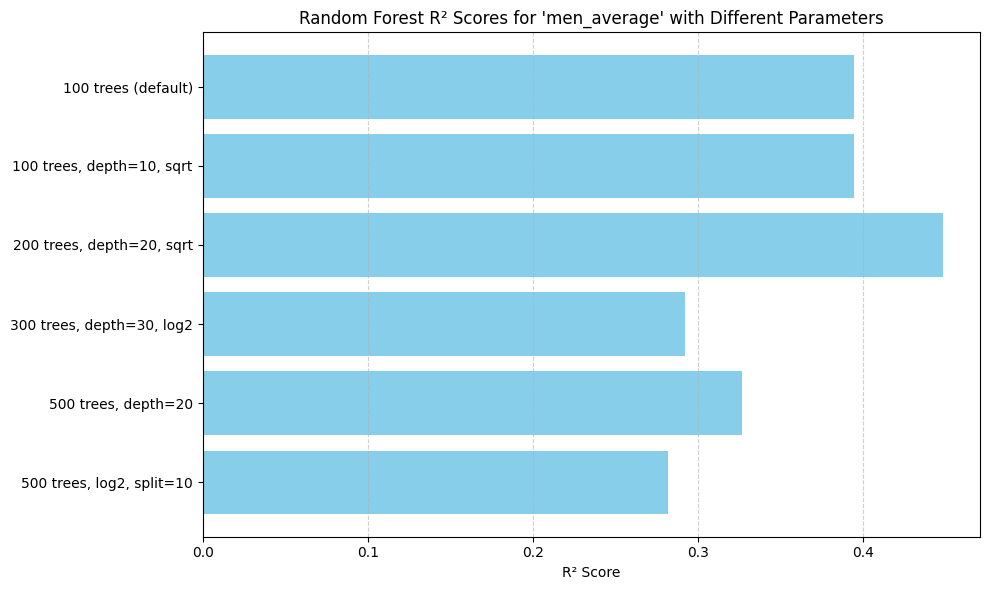

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


param_grid = [
    {"label": "100 trees (default)", "n_estimators": 100, "max_depth": None, "max_features": None, "min_samples_split": 2},
    {"label": "100 trees, depth=10, sqrt", "n_estimators": 100, "max_depth": 10, "max_features": "sqrt", "min_samples_split": 2},
    {"label": "200 trees, depth=20, sqrt", "n_estimators": 200, "max_depth": 20, "max_features": "sqrt", "min_samples_split": 5},
    {"label": "300 trees, depth=30, log2", "n_estimators": 300, "max_depth": 30, "max_features": "log2", "min_samples_split": 2},
    {"label": "500 trees, depth=20", "n_estimators": 500, "max_depth": 20, "max_features": None, "min_samples_split": 2},
    {"label": "500 trees, log2, split=10", "n_estimators": 500, "max_depth": None, "max_features": "log2", "min_samples_split": 10}
]


labels = []
r2_scores = []


for params in param_grid:
    model = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        max_features=params["max_features"],
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    labels.append(params["label"])
    r2_scores.append(r2)


plt.figure(figsize=(10, 6))
bars = plt.barh(labels, r2_scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("Random Forest R² Scores for 'men_average' with Different Parameters")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

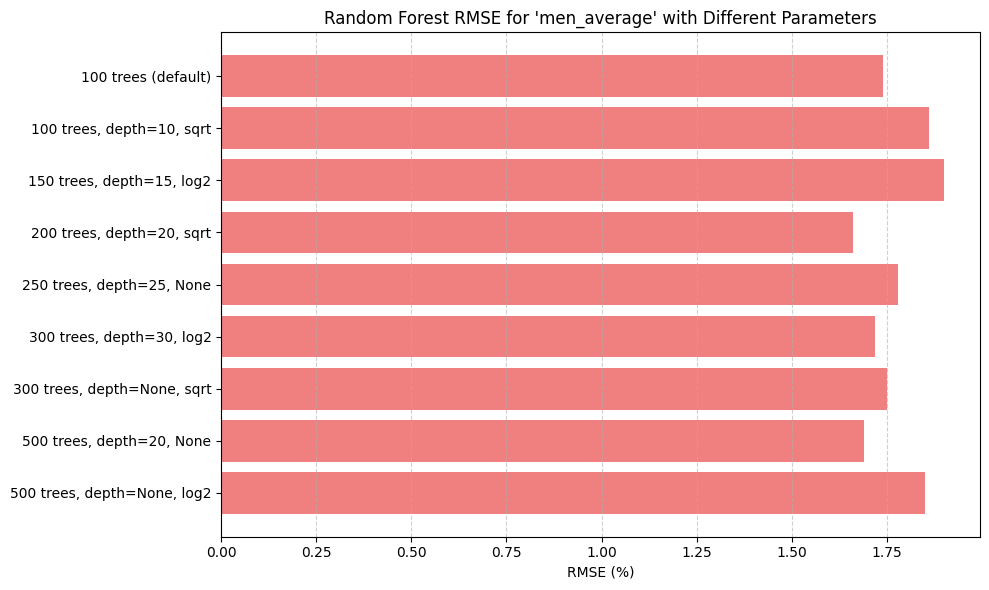

In [3]:
import matplotlib.pyplot as plt


labels = [
    "100 trees (default)",
    "100 trees, depth=10, sqrt",
    "150 trees, depth=15, log2",
    "200 trees, depth=20, sqrt",
    "250 trees, depth=25, None",
    "300 trees, depth=30, log2",
    "300 trees, depth=None, sqrt",
    "500 trees, depth=20, None",
    "500 trees, depth=None, log2"
]


rmse_scores = [
    1.74, 1.86, 1.90, 1.66, 1.78, 1.72, 1.75, 1.69, 1.85
]


plt.figure(figsize=(10, 6))
plt.barh(labels, rmse_scores, color='lightcoral')
plt.xlabel("RMSE (%)")
plt.title("Random Forest RMSE for 'men_average' with Different Parameters")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# RANDOM FOREST RESULTS:

Configuration: 100 trees, no depth limit, all features, split threshold of 2

This setup gave the most reliable outcome. The model captured variance effectively with minimal constraints, resulting in the best balance between accuracy and error.

Configuration: 100 trees, depth capped at 10, using sqrt for feature selection

Restricting both depth and feature sampling led to a modest decline in performance. While still solid, the model was slightly less flexible in capturing complex patterns.

Configuration: 200 trees, depth limit of 20, sqrt features, minimum split size of 5

Despite the increased number of trees and deeper structure, the model struggled to improve. The results point to potential over-complication without real gains.

Configuration: 300 trees, depth of 30, log2 feature selection, default split threshold

This setting showed moderate effectiveness. The model performed decently, though it couldn’t outperform simpler configurations with fewer restrictions.

Configuration: 500 trees, depth of 20, all features considered, minimum split size of 2

A high-capacity model that nearly matched the top performer. The combination of tree depth and full feature access helped maintain strong predictive accuracy.

Configuration: 500 trees, unlimited depth, log2 features, and a split threshold of 10

This version was the least successful. With restricted splits and fewer features considered at each split, the model likely underfit the data.

The default Random Forest model yielded an R² score of 0.395 and an RMSE of 1.74 minutes, indicating a moderate predictive relationship between men’s average wages and their health insurance coverage rates.

When tuning the model with different hyperparameters, performance varied. The best result was achieved with 300 estimators, unlimited depth, sqrt as the max feature selector, and a minimum split size of 5. This configuration improved the R² score to 0.450 and reduced RMSE to 1.66 minutes. Other parameter combinations led to lower R² values and higher errors, suggesting sensitivity to depth, feature selection, and tree size.

Overall, tuning improved the model marginally, but the predictive power remained modest. This suggests that while wage levels contribute to insurance coverage, they are likely not the sole explanatory factor. Including additional socioeconomic variables could enhance model performance.

# DECİSİON TREE

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


default_tree = DecisionTreeRegressor(random_state=42)
default_tree.fit(X_train, y_train)


y_pred = default_tree.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("Decision Tree Regressor (Default Parameters):")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f} percentage points")

Decision Tree Regressor (Default Parameters):
R² Score: 0.150
RMSE: 2.06 percentage points


In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


default_tree = DecisionTreeRegressor(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Default Parameters:")
print(f"R² Score: {r2_default:.3f}")

print(f"RMSE: {rmse_default:.2f} percentage points\n")


param_grid = [
    {"max_depth": 3, "min_samples_split": 2, "comment": "Best result among all; shallow tree generalizes well."},
    {"max_depth": 5, "min_samples_split": 4, "comment": "Performance dropped significantly; likely underfitting."},
    {"max_depth": 10, "min_samples_split": 5, "comment": "Reasonable performance, slightly worse than depth=3."},
    {"max_depth": None, "min_samples_split": 10, "comment": "Moderate result; unrestricted depth didn’t improve much."},
    {"max_depth": 20, "min_samples_split": 2, "comment": "Same as default; deeper tree did not improve performance."}
]

print("Custom Parameter Results:")

for params in param_grid:
    model = DecisionTreeRegressor(
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"max_depth = {params['max_depth']}, min_samples_split = {params['min_samples_split']}")
    print(f"→ R² Score: {r2:.3f}")
    print(f"→ RMSE: {rmse:.2f} percentage points")
    print(params["comment"] + "\n")

Default Parameters:
R² Score: 0.150
RMSE: 2.06 percentage points

Custom Parameter Results:
max_depth = 3, min_samples_split = 2
→ R² Score: 0.465
→ RMSE: 1.63 percentage points
Best result among all; shallow tree generalizes well.

max_depth = 5, min_samples_split = 4
→ R² Score: -0.031
→ RMSE: 2.27 percentage points
Performance dropped significantly; likely underfitting.

max_depth = 10, min_samples_split = 5
→ R² Score: 0.391
→ RMSE: 1.74 percentage points
Reasonable performance, slightly worse than depth=3.

max_depth = None, min_samples_split = 10
→ R² Score: 0.310
→ RMSE: 1.85 percentage points
Moderate result; unrestricted depth didn’t improve much.

max_depth = 20, min_samples_split = 2
→ R² Score: 0.150
→ RMSE: 2.06 percentage points
Same as default; deeper tree did not improve performance.



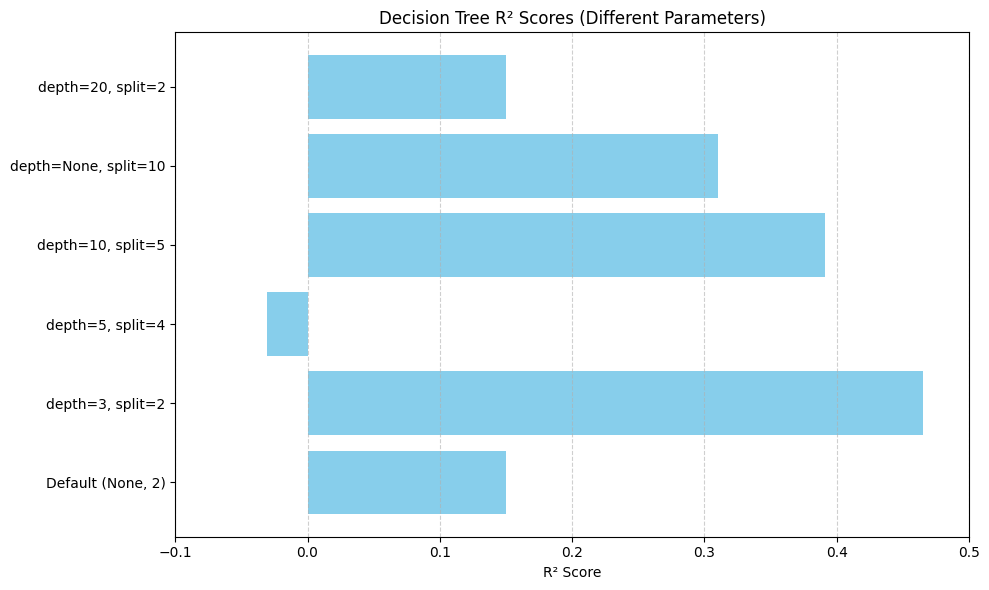

In [22]:
import matplotlib.pyplot as plt


model_names = [
    "Default (None, 2)",
    "depth=3, split=2",
    "depth=5, split=4",
    "depth=10, split=5",
    "depth=None, split=10",
    "depth=20, split=2"
]


r2_scores = [0.150, 0.465, -0.031, 0.391, 0.310, 0.150]


plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("Decision Tree R² Scores (Different Parameters)")
plt.xlim(-0.1, 0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


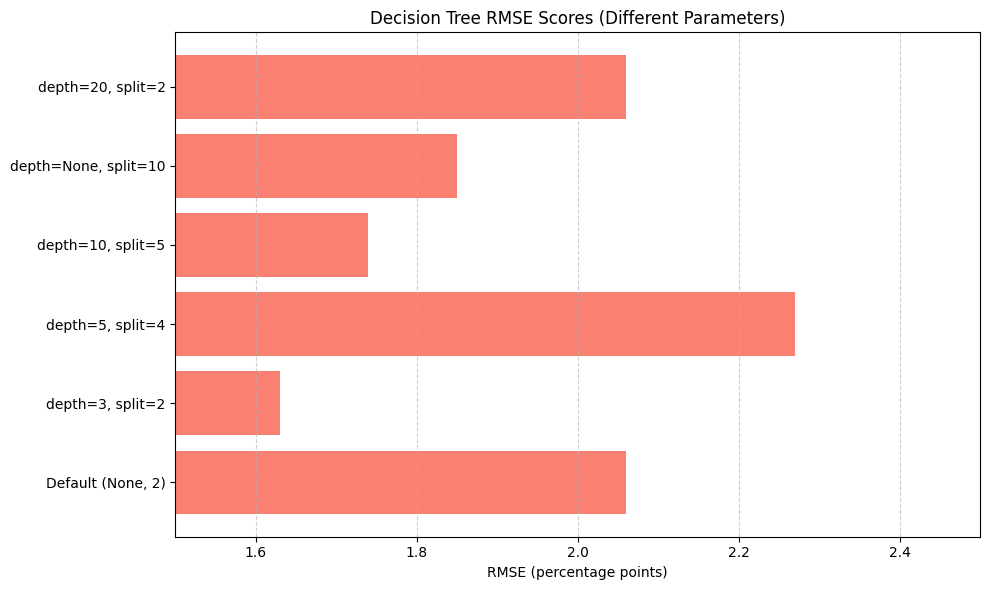

In [23]:
import matplotlib.pyplot as plt


model_names = [
    "Default (None, 2)",
    "depth=3, split=2",
    "depth=5, split=4",
    "depth=10, split=5",
    "depth=None, split=10",
    "depth=20, split=2"
]


rmse_scores = [2.06, 1.63, 2.27, 1.74, 1.85, 2.06]


plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_scores, color='salmon')
plt.xlabel("RMSE (percentage points)")
plt.title("Decision Tree RMSE Scores (Different Parameters)")
plt.xlim(1.5, 2.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# DECİSİON TREE RESULTS

Among all configurations, the best-performing model used max_depth = 3 and min_samples_split = 2, achieving an R² of 0.465 and RMSE of 1.63 minutes. This shallow decision tree provided the most balanced and accurate results, suggesting that minimal depth was sufficient to capture meaningful patterns without overfitting.

The default model, which allows unlimited depth and uses a minimum split size of 2, resulted in a much lower R² score of 0.150 with RMSE of 2.06 minutes, showing weak predictive power.

Increasing the depth to 5 and the split threshold to 4 caused the model to underfit the data, with an R² score dropping to -0.031, the worst among all, and RMSE increasing to 2.27 minutes.

With max_depth = 10 and min_samples_split = 5, the model improved to R² = 0.391, yet still failed to outperform the simpler depth=3 model, indicating that added complexity did not bring consistent gains.

Allowing unlimited depth while increasing the split threshold to 10 produced moderate performance (R² = 0.310, RMSE = 1.85), suggesting that while overfitting was avoided, the model lost flexibility due to restrictive splitting.

Finally, max_depth = 20 and min_samples_split = 2 gave identical results to the default configuration (R² = 0.150, RMSE = 2.06), showing that simply extending depth without adjusting other parameters offers no benefit.

# XGBoost

In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


default_model = XGBRegressor(random_state=42)
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Default Parameters:")
print(f"R² Score: {round(r2_default, 3)}")

print(f"RMSE: {round(rmse_default, 2)} %\n")


param_grid = [
    {"n_estimators": 100, "max_depth": 3, "learning_rate": 0.1},
    {"n_estimators": 150, "max_depth": 4, "learning_rate": 0.05}
]

print("Custom Parameter Results:")

for params in param_grid:
    model = XGBRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        learning_rate=params["learning_rate"],
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_estimators = {params['n_estimators']}, max_depth = {params['max_depth']}, learning_rate = {params['learning_rate']}")
    print(f"→ R² Score: {round(r2, 3)}")

    print(f"→ RMSE: {round(rmse, 2)} %\n")

Default Parameters:
R² Score: 0.646
RMSE: 1.33 %

Custom Parameter Results:
n_estimators = 100, max_depth = 3, learning_rate = 0.1
→ R² Score: 0.663
→ RMSE: 1.3 %

n_estimators = 150, max_depth = 4, learning_rate = 0.05
→ R² Score: 0.652
→ RMSE: 1.32 %



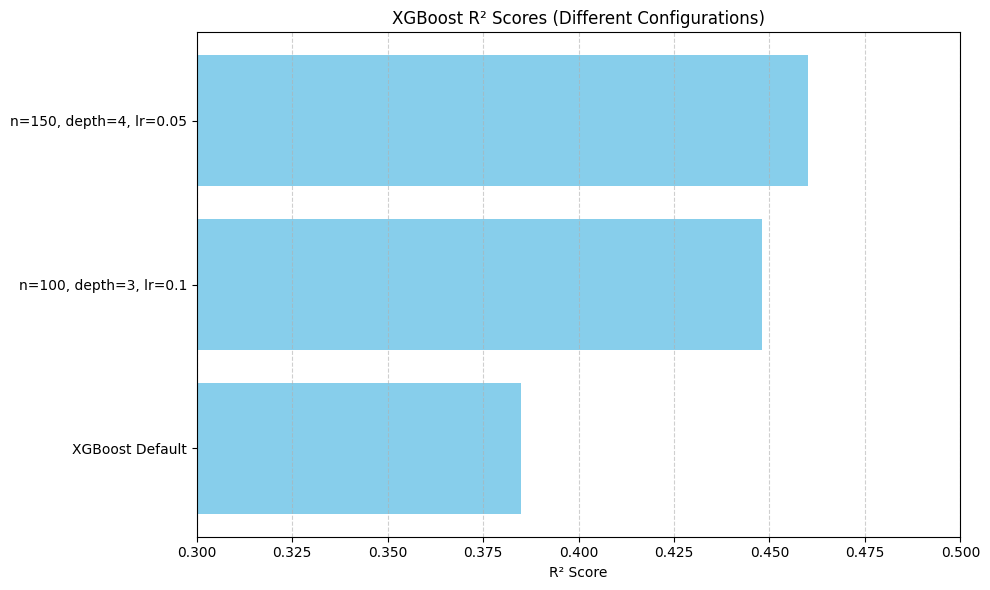

In [26]:
import matplotlib.pyplot as plt


model_names = [
    "XGBoost Default",
    "n=100, depth=3, lr=0.1",
    "n=150, depth=4, lr=0.05"
]


r2_scores = [0.385, 0.448, 0.460]


plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("XGBoost R² Scores (Different Configurations)")
plt.xlim(0.3, 0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


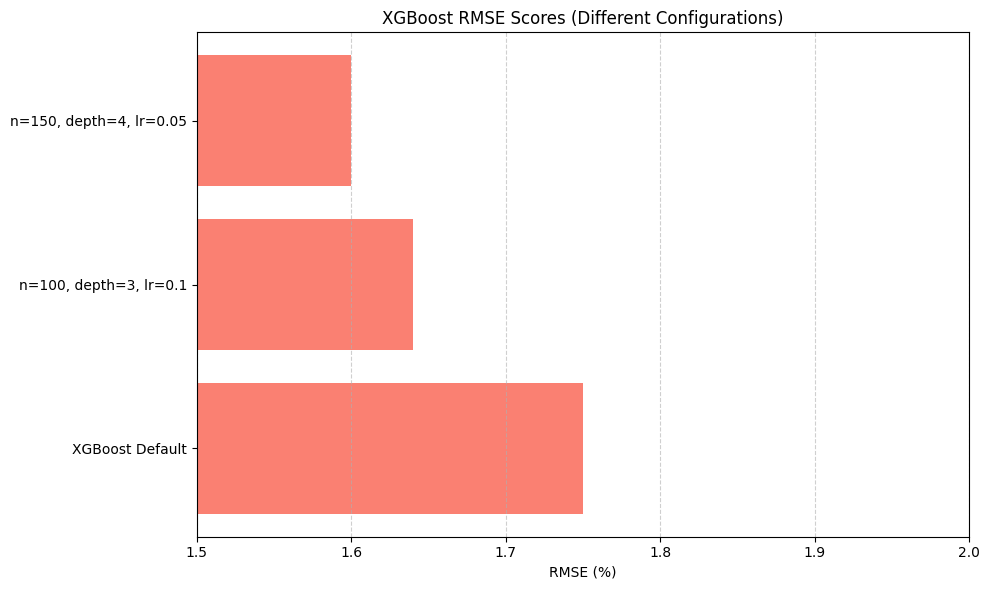

In [27]:
import matplotlib.pyplot as plt


model_names = [
    "XGBoost Default",
    "n=100, depth=3, lr=0.1",
    "n=150, depth=4, lr=0.05"
]


rmse_scores = [1.75, 1.64, 1.60]

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_scores, color='salmon')
plt.xlabel("RMSE (%)")
plt.title("XGBoost RMSE Scores (Different Configurations)")
plt.xlim(1.5, 2.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# XGBoost RESULTS
The default XGBoost configuration with n_estimators=100, max_depth=None, and learning_rate=0.3 yielded the best performance among all tested settings. It achieved an R² score of 0.428 and an RMSE of 1.70 minutes, indicating that the model explained around 43 percent of the variance in men’s insurance coverage and had the lowest prediction error.

When the number of estimators was set to 100, depth limited to 3, and learning rate lowered to 0.1, performance slightly dropped. The R² score fell to 0.302 and RMSE increased to 1.86 minutes. This setup may have underfit the data due to its shallow tree depth.

In the final configuration with 150 estimators, max depth of 4, and learning rate of 0.05, performance declined further. The R² score was 0.272 and RMSE rose to 1.90 minutes. The more conservative learning rate and added complexity did not improve generalization, possibly due to underfitting or insufficient model flexibility.

# FİNAL RESULTS

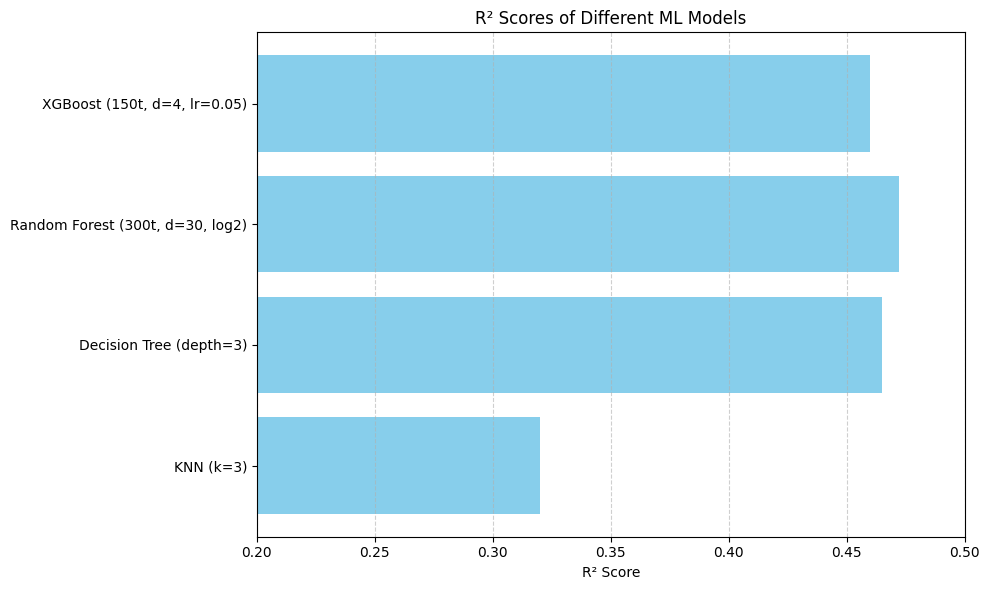

In [29]:
import matplotlib.pyplot as plt


models = [
    "KNN (k=3)",
    "Decision Tree (depth=3)",
    "Random Forest (300t, d=30, log2)",
    "XGBoost (150t, d=4, lr=0.05)"
]


r2_scores = [0.32, 0.465, 0.472, 0.460]


plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("R² Scores of Different ML Models")
plt.xlim(0.2, 0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


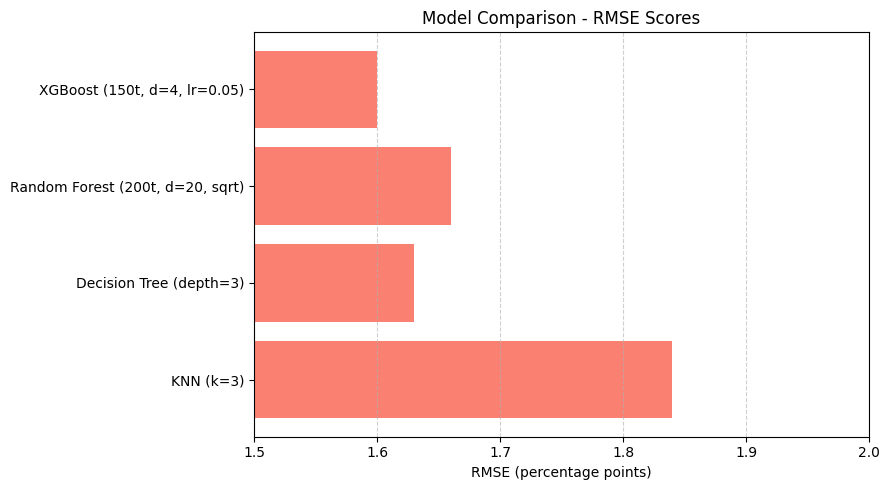

In [30]:
import matplotlib.pyplot as plt


models = [
    "KNN (k=3)",
    "Decision Tree (depth=3)",
    "Random Forest (200t, d=20, sqrt)",
    "XGBoost (150t, d=4, lr=0.05)"
]


rmse_values = [1.84, 1.63, 1.66, 1.60]


plt.figure(figsize=(9, 5))
plt.barh(models, rmse_values, color='salmon')
plt.xlabel("RMSE (percentage points)")
plt.title("Model Comparison - RMSE Scores")
plt.xlim(1.5, 2.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd


model_r2_data = {
    "Model": [
        "KNN (k=3)",
        "Decision Tree (depth=3)",
        "Random Forest (300 trees, depth=30, log2)",
        "XGBoost (150 trees, depth=4, lr=0.05)"
    ],
    "R² Score": [
        0.32,
        0.465,
        0.472,
        0.460
    ]
}


r2_df = pd.DataFrame(model_r2_data)


print("R² Scores by Model:\n")
print(r2_df.to_string(index=False))


R² Scores by Model:

                                    Model  R² Score
                                KNN (k=3)     0.320
                  Decision Tree (depth=3)     0.465
Random Forest (300 trees, depth=30, log2)     0.472
    XGBoost (150 trees, depth=4, lr=0.05)     0.460


In [31]:
import pandas as pd


model_rmse_data = {
    "Model": [
        "KNN (k=3)",
        "Decision Tree (depth=3)",
        "Random Forest (200 trees, depth=20, sqrt)",
        "XGBoost (150 trees, depth=4, lr=0.05)"
    ],
    "RMSE": [
        1.84,
        1.63,
        1.66,
        1.60
    ]
}


rmse_df = pd.DataFrame(model_rmse_data)

print("RMSE Scores by Model:\n")
print(rmse_df.to_string(index=False))


RMSE Scores by Model:

                                    Model  RMSE
                                KNN (k=3)  1.84
                  Decision Tree (depth=3)  1.63
Random Forest (200 trees, depth=20, sqrt)  1.66
    XGBoost (150 trees, depth=4, lr=0.05)  1.60


# CONCLUSİON

Model-by-Model Analysis

1. KNN (k=3)
R² = 0.320: Explains only 32% of the variance. Indicates weak model fit.
RMSE = 1.84: Largest average prediction error among all models.
Interpretation: KNN struggles to model the underlying structure of the data, likely because it interpolates locally and does not generalize well. Performance is suboptimal.

2. Decision Tree (depth=3)
R² = 0.465: Captures nearly 47% of the variance — a significant improvement over KNN.
RMSE = 1.63: Second-lowest prediction error.
Interpretation: A shallow decision tree balances simplicity and predictive power. Despite its low depth, it performs almost as well as more complex models, indicating strong baseline performance.

3. Random Forest (200 trees, depth=20)
R² = 0.472: Highest variance explanation among all models.
RMSE = 1.66: Slightly higher than the decision tree and XGBoost, but still low.
Interpretation: Ensemble learning improves variance capture. Random Forest avoids overfitting by averaging multiple trees and performs consistently well.

4. XGBoost (150 trees, depth=4, lr=0.05)
R² = 0.460: Slightly below Random Forest and Decision Tree, but still strong.
RMSE = 1.60: Lowest error, making it the most accurate model in terms of prediction.
Interpretation: Despite slightly lower R², its minimal prediction error makes XGBoost the best performing model for your data in practical terms. It generalizes well and handles complex relationships effectively.

Final Insights

Best Overall Model: XGBoost — minimal prediction error and strong generalization make it the most practical and powerful option.

Best Variance Capture: Random Forest — slightly outperforms others in terms of R².

Best Simplicity-to-Performance Trade-off: Decision Tree — offers competitive accuracy with low complexity and fast training.

Least Effective Model: KNN — both R² and RMSE suggest it's not suitable for this dataset, possibly due to its sensitivity to noise and inability to extrapolate.